# Supplementary material for "Mesoscale to submesoscale wavenumber spectra in Drake Passage" (in prep. for JPO)
## C. B. Rocha, T. K. Chereskin, S. T. Gille, and D. Menemenlis 

This notebook showcases the use of decomposition of one-dimensional kinetic energy (KE) spectra into rotational and divergent components using the decomposition proposed by Bühler et al. JFM 2014. We implemented this decomposition in Python. The function "spec_helm_decomp.py" takes the one-dimensional along-track spectra of across-track and along-track velocity components and returns the corresponding rotational and divergent spectra. This function is part of **pyspec**, a legit Python package for spectral analysis that was developed as part of this project (openly available on [github](https://github.com/crocha700/pyspec)). If you do not want to install **pyspec**, you can always download the specific module (*helmholtz.py*) and import it into Python, or copy the function *spec_helm_decomp* into your code and call it directly. 

For details about the calculation see appendix C of Rocha et al. (in prep.) and the original paper by [Bühler et al. JFM 2014](http://www.cims.nyu.edu/~obuhler/Oliver_Buhler/Publications_files/BuhlerCalliesFerrariJFM14.pdf).

In [73]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# if you don't have pyspec installed comment this out
#   and follow the instructions below
from pyspec import helmholtz as helm

# copy helmholts.py into your working directory and import it
#   (just uncomment the line below)
# import helmholtz as helm 

# Some plotting stuff
Not needed, but make the plots nicer.

In [83]:
# set figure params: bigger fonts, labels, etc.
plt.rcParams.update({'font.size': 25, 'legend.handlelength'  : 1.5
    , 'legend.markerscale': 1.})
plt.rc('xtick', labelsize=22) 
plt.rc('ytick', labelsize=22)

# some colors (prettier than default boring colors)
color2 = '#6495ed'
color1 = '#ff6347'
color5 = '#8470ff'
color3 = '#3cb371'
color4 = '#ffd700'
color6 = '#ba55d3'

lw=3    # linewith
aph=.7  # transparency

# avoid typing the exact same lines of code many times
def plt_labels(ax):
    """ write KE spectrum labels """
    ax.set_xlabel("Along-track wavenumber [cpkm]")
    ax.set_ylabel(r"KE spectral density [m$^2$ s$^{-2}$/cpkm]")

# Testing

First we test the decomposition with a synthetic spectrum to check its correcteness and assess its accuracy.

In [65]:
k = np.linspace(.5*1e-2,1.,250)
dk = k[1]-k[0]

We create two sets of one-dimensional spectra that follows a $k^{-3}$ power law

In [76]:
E3 = 1./k**3
KEaux = 2*E3.sum()*dk
E3 = E3/KEaux

One is solely horizontally rotational (nondivergent)

In [ ]:
Cu_rot, Cv_rot = 3*E3, E3   # purely rotational

The other is purely horizontally divergent (irrotarional)

In [77]:
Cu_div, Cv_div = E3, 3*E3   # purely divergent

In [78]:
Cpsi_rot, Cphi_rot = helm.spec_helm_decomp(k,Cu_rot, Cv_rot)
Cpsi_div, Cphi_div = helm.spec_helm_decomp(k,Cu_div, Cv_div)

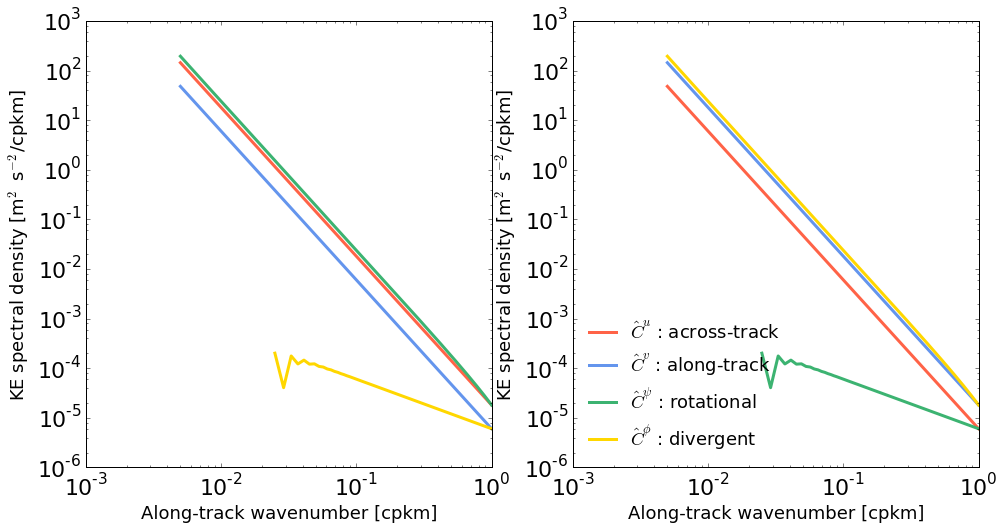

In [79]:
fig = plt.figure(facecolor='w', figsize=(16.,8.))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)


ax.loglog(k,Cu_rot/2,color=color1,linewidth=lw,\
           label=r'$\hat{C}^u$: across-track')
ax.loglog(k,Cv_rot/2,color=color2,linewidth=lw,\
           label=r'$\hat{C}^v$: along-track')

ax.loglog(k,Cpsi_rot/2.,color=color3,linewidth=lw,\
           label=r'$\hat{C}^\psi$: rotational')
ax.loglog(k,Cphi_rot/2.,'g',color=color4,linewidth=lw,\
           label=r'$\hat{C}^\phi$: divergent')

ax2.loglog(k,Cu_div/2,color=color1,linewidth=lw,\
           label=r'$\hat{C}^u$: across-track')
ax2.loglog(k,Cv_div/2,color=color2,linewidth=lw,\
           label=r'$\hat{C}^v$: along-track')

ax2.loglog(k,Cpsi_div/2.,color=color3,linewidth=lw,\
           label=r'$\hat{C}^\psi$: rotational')
ax2.loglog(k,Cphi_div/2.,'g',color=color4,linewidth=lw,\
           label=r'$\hat{C}^\phi$: divergent')

lg = ax2.legend(loc=3)

plt_labels(ax2)
plt_labels(ax)

#An example with the Drake Passage spectrum

We now apply the Bühler et al. 2014 decomposition to a real-ocean spectrum. We use the KE spectrum of upper most layer considered in Rocha et al. (in prep.)

In [69]:
data_path = './outputs/'
slab1=np.load(data_path+'adcp_spec_slab1.npz')

In [70]:
Cpsi_slab1, Cphi_slab1 = helm.spec_helm_decomp(slab1['k'],slab1['Eu'], slab1['Ev'])

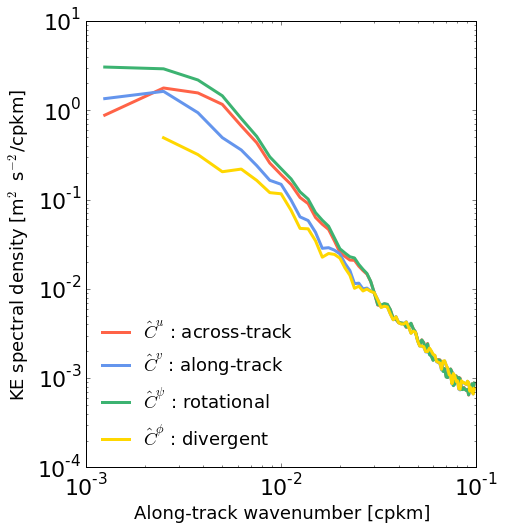

In [71]:
fig = plt.figure(facecolor='w', figsize=(7.,8.))

ax1 = fig.add_subplot(111)

ax1.loglog(slab1['k'],slab1['Eu']/2,color=color1,linewidth=lw,\
           label=r'$\hat{C}^u$: across-track')
ax1.loglog(slab1['k'],slab1['Ev']/2.,color=color2,linewidth=lw,\
           label=r'$\hat{C}^v$: along-track')

ax1.loglog(slab1['k'],Cpsi_slab1/2.,color=color3,linewidth=lw,\
           label=r'$\hat{C}^\psi$: rotational')
ax1.loglog(slab1['k'],Cphi_slab1/2.,color=color4,linewidth=lw,\
           label=r'$\hat{C}^\phi$: divergent')

lg = ax1.legend(loc=3)
plt_labels(ax1)